In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [11]:
DATASET_DIR = "/content/drive/MyDrive/Lab-1/transport"
CLASSES = ["bike", "cars"]


In [12]:
import os

for cls in CLASSES:
    path = os.path.join(DATASET_DIR, cls)
    print("Checking:", path)
    if not os.path.exists(path):
        raise FileNotFoundError(f"Folder not found: {path}")

print("✔ Folder structure verified successfully")


Checking: /content/drive/MyDrive/Lab-1/transport/bike
Checking: /content/drive/MyDrive/Lab-1/transport/cars
✔ Folder structure verified successfully


In [13]:
import cv2
import numpy as np
import os

IMG_SIZE = 64

def load_images(dataset_dir, classes, img_size):
    X, y = [], []

    for label, cls in enumerate(classes):
        class_path = os.path.join(dataset_dir, cls)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            img = cv2.imread(img_path)
            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (img_size, img_size))
            img = img / 255.0
            img = img.flatten()

            X.append(img)
            y.append(label)

    return np.array(X), np.array(y)


In [14]:
X, y = load_images(DATASET_DIR, CLASSES, IMG_SIZE)
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (785, 12288)
y shape: (785,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)


In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [17]:
def initialize_params(n_features):
    W = np.zeros((n_features, 1))
    b = 0
    return W, b


In [18]:
def propagate(W, b, X, y):
    m = X.shape[0]
    y = y.reshape(-1, 1)

    Z = np.dot(X, W) + b
    A = sigmoid(Z)

    cost = -(1/m) * np.sum(
        y * np.log(A + 1e-8) + (1 - y) * np.log(1 - A + 1e-8)
    )

    dW = (1/m) * np.dot(X.T, (A - y))
    db = (1/m) * np.sum(A - y)

    return dW, db, cost


In [19]:
def train_model(X, y, lr=0.01, iterations=1000):
    W, b = initialize_params(X.shape[1])
    costs = []

    for i in range(iterations):
        dW, db, cost = propagate(W, b, X, y)

        W -= lr * dW
        b -= lr * db
        costs.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}, Cost = {cost:.4f}")

    return W, b, costs


In [20]:
W, b, costs = train_model(X_train, y_train)


Iteration 0, Cost = 0.6931
Iteration 100, Cost = 0.7355
Iteration 200, Cost = 0.9209
Iteration 300, Cost = 1.1464
Iteration 400, Cost = 1.0391
Iteration 500, Cost = 0.9422
Iteration 600, Cost = 0.8626
Iteration 700, Cost = 0.7962
Iteration 800, Cost = 0.7390
Iteration 900, Cost = 0.6881


In [21]:
def predict(W, b, X):
    Z = np.dot(X, W) + b
    A = sigmoid(Z)
    return (A >= 0.5).astype(int)


In [22]:
train_preds = predict(W, b, X_train)
test_preds = predict(W, b, X_test)

train_acc = np.mean(train_preds.flatten() == y_train) * 100
test_acc = np.mean(test_preds.flatten() == y_test) * 100

print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Testing Accuracy: {test_acc:.2f}%")


Training Accuracy: 72.61%
Testing Accuracy: 59.24%


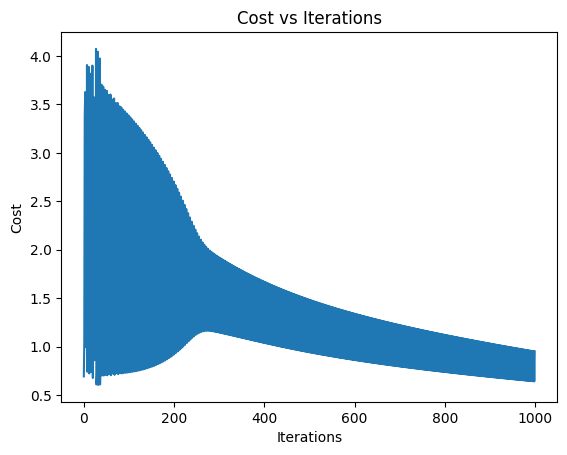

In [23]:
import matplotlib.pyplot as plt

plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()
